In [1]:
#MCMC Assignment 1

In [80]:

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import math as m

In [2]:
N = np.random.normal(0,1,10000)
U = np.random.uniform(0,1,10000)

Text(0.5,0,'Number picked')

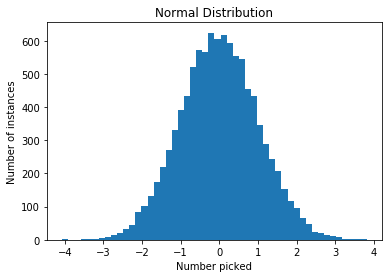

In [3]:
plt.hist(N,50);
plt.title('Normal Distribution')
plt.ylabel('Number of instances')
plt.xlabel('Number picked')

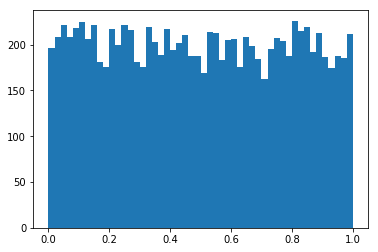

In [4]:
plt.hist(U,50);

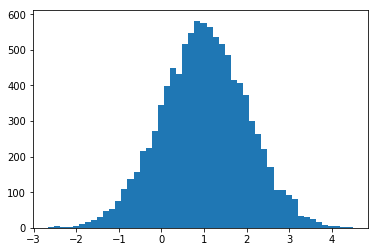

In [5]:
P = np.random.normal(1,1,10000)
plt.hist(P,50);

In [88]:
# So now I want to run a basic MCMC on the distribution P and hopefully get
# back the pdf of a gaussian with std and mean = 1
# the function 'p' is the pdf that I want to pull from but maybe i don't
# know how to pull from.
def pg(x): 
    return (1/np.sqrt(2*np.pi))*m.exp(-(x - 1)**2/(2*1**2))

def MCMC_Gaussian(N):
    x = np.zeros((4,N+1))
    for j in range(4):
        i = 0
        alpha_2 = 10**(j-2)  #Loop through the different alpha values
        acpt_count = 0
        x[j,0] = 3 # My compleatly uneducated guess. 


        while i < N:
            y = x[j,i] + np.random.uniform(-m.sqrt(alpha_2),m.sqrt(alpha_2))
            H = pg(y)/pg(x[j,i])
            #Now see if we move or not
            foo = np.random.uniform(0,1)
            if H >= foo:
                x[j,i+1] = y
                acpt_count += 1
            else:
                x[j,i+1] = x[j,i]    
            i += 1
        print('Percentage of jumps acepted', acpt_count/N*100, 'for', alpha_2)

    # Now I'd like to plot them all
    fig, ax1 = plt.subplots(2,2, figsize = (10,10))
    fig.suptitle('N = %i' %(N), fontsize = 14)

    # I want to put the actualy PDF on top of the histopgram for clarity. 
    mu = 1
    variance = 1
    sigma = m.sqrt(variance)
    pdf = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    
    plt.subplot(221)
    plt.hist(x[0,:],50, normed = True);
    plt.plot(pdf,mlab.normpdf(pdf, mu, sigma),color = 'r')
    plt.title('alpha = 0.01')
    
    plt.subplot(222)
    plt.hist(x[1,:],50, normed = True);
    plt.plot(pdf,mlab.normpdf(pdf, mu, sigma),color = 'r')
    plt.title('alpha = 0.1')

    plt.subplot(223)
    plt.hist(x[2,:],50, normed = True);
    plt.plot(pdf,mlab.normpdf(pdf, mu, sigma),color = 'r')
    plt.title('alpha = 1')

    plt.subplot(224)
    plt.hist(x[3,:],50, normed = True);
    plt.plot(pdf,mlab.normpdf(pdf, mu, sigma),color = 'r')
    plt.title('alpha = 10')

    fig.tight_layout()
    fig.subplots_adjust(top = 0.91)
    plt.show()

Percentage of jumps acepted 98.05 for 0.01
Percentage of jumps acepted 93.43 for 0.1
Percentage of jumps acepted 80.58999999999999 for 1
Percentage of jumps acepted 47.29 for 10


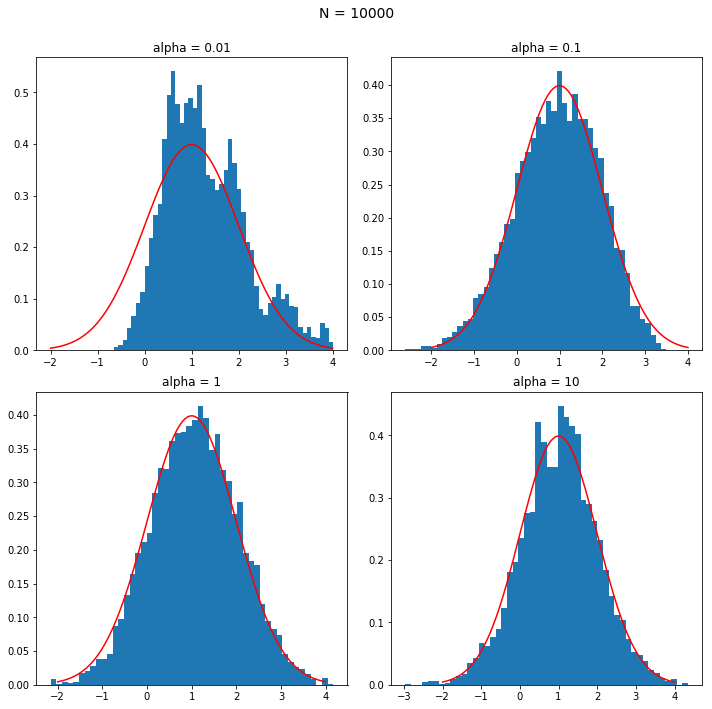

In [89]:
MCMC_Gaussian(10000)

Percentage of jumps acepted 98.7 for 0.01
Percentage of jumps acepted 93.30000000000001 for 0.1
Percentage of jumps acepted 81.5 for 1
Percentage of jumps acepted 48.5 for 10


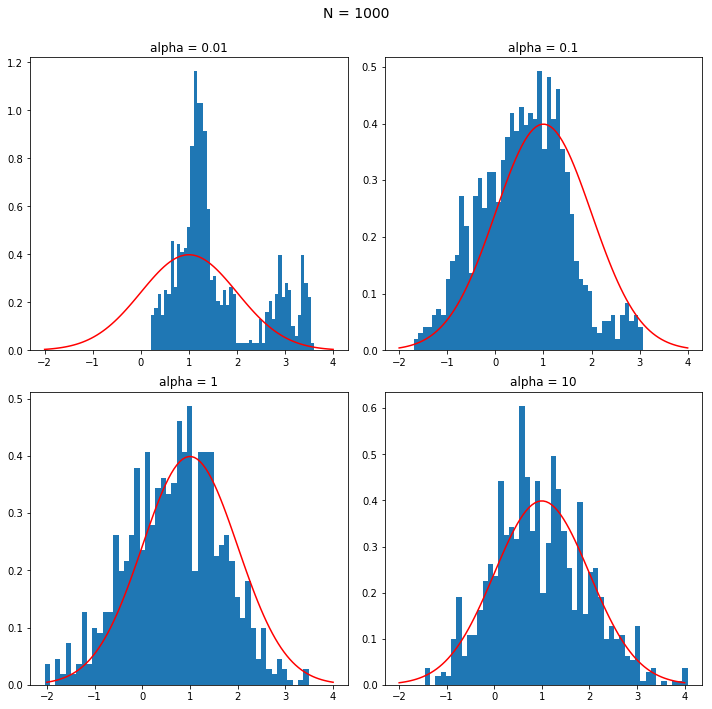

In [90]:
MCMC_Gaussian(1000)

In [91]:
#Now I'd like to do it again but with a Student-t distribution. 

In [132]:
def Student_t(x,nu,sigma,mu):
    A = m.gamma((nu + 1)/2)
    B = m.gamma(nu/2)*np.sqrt(nu*np.pi)*sigma
    C = (1/nu)*((x-mu)/sigma)**2
    return (A/B)*(1+C)**-((nu+1)/2)

def gam(N,h,x):
    x_bar = 0
    for j in range(4):
        x_bar = np.mean(x)
        foo = 0
        i = 0
        while i <= N-h:
            foo += (x[i+h] - x_bar)*(x[i] - x_bar)
            i += 1
    return (1/(N-h))*foo

def MCMC_T(N,nu,sigma,mu):
    x = np.zeros((4,N+1))
    for j in range(4):
        i = 0
        alpha_2 = 10**(j-2)  #Loop through the different alpha values
        acpt_count = 0.0
        x[j,0] = 3 # My compleatly uneducated guess. 


        while i < N:
            y = x[j,i] + np.random.normal(0,m.sqrt(alpha_2))
            H = Student_t(y,nu,sigma,mu)/Student_t(x[j,i],nu,sigma,mu)
            #Now see if we move or not
            foo = np.random.uniform(0,1)
            if H >= foo:
                x[j,i+1] = y
                acpt_count += 1
            else:
                x[j,i+1] = x[j,i]    
            i += 1
        print('Percentage of jumps acepted', acpt_count/N*100, 'for',
              alpha_2)
    
    #Now I want to find the Auto-Correlation Length, as defined as:
    #row(h) = gam(h)/gam(0). The auto correlation length 'h' is roughly when
    #row(h) ~ 0.01
        row = 1
        h = 1
        while row > 0.01:
            row = gam(N,h,x[j,:])/gam(N,0,x[j,:])
            h += 1
        print('Auto-Correlation length for alpha = %s is h = %s' %(alpha_2, h))
    # Now I'd like to plot them all
    fig, ax1 = plt.subplots(2,2, figsize = (10,10))
    fig.suptitle('N = %i' %(N), fontsize = 14)

    # I want to put the actualy PDF on top of the histopgram for clarity. 
    x_lin = np.arange(-10,10,0.02)
    
    plt.subplot(221)
    plt.hist(x[0,:],50, normed = True);
    plt.plot(x_lin,Student_t(x_lin,nu,sigma,mu),'r')
    plt.title('alpha = 0.01')
    
    plt.subplot(222)
    plt.hist(x[1,:],50, normed = True);
    plt.plot(x_lin,Student_t(x_lin,nu,sigma,mu),'r')
    plt.title('alpha = 0.1')

    plt.subplot(223)
    plt.hist(x[2,:],50, normed = True);
    plt.plot(x_lin,Student_t(x_lin,nu,sigma,mu),'r')
    plt.title('alpha = 1')

    plt.subplot(224)
    plt.hist(x[3,:],50, normed = True);
    plt.plot(x_lin,Student_t(x_lin,nu,sigma,mu),'r')
    plt.title('alpha = 10')

    fig.tight_layout()
    fig.subplots_adjust(top = 0.91)
    plt.show()

Percentage of jumps acepted 97.17 for 0.01
Auto-Correlation length for alpha = 0.01 is h = 517
Percentage of jumps acepted 91.10000000000001 for 0.1
Auto-Correlation length for alpha = 0.1 is h = 226
Percentage of jumps acepted 73.03 for 1
Auto-Correlation length for alpha = 1 is h = 161
Percentage of jumps acepted 42.78 for 10
Auto-Correlation length for alpha = 10 is h = 24


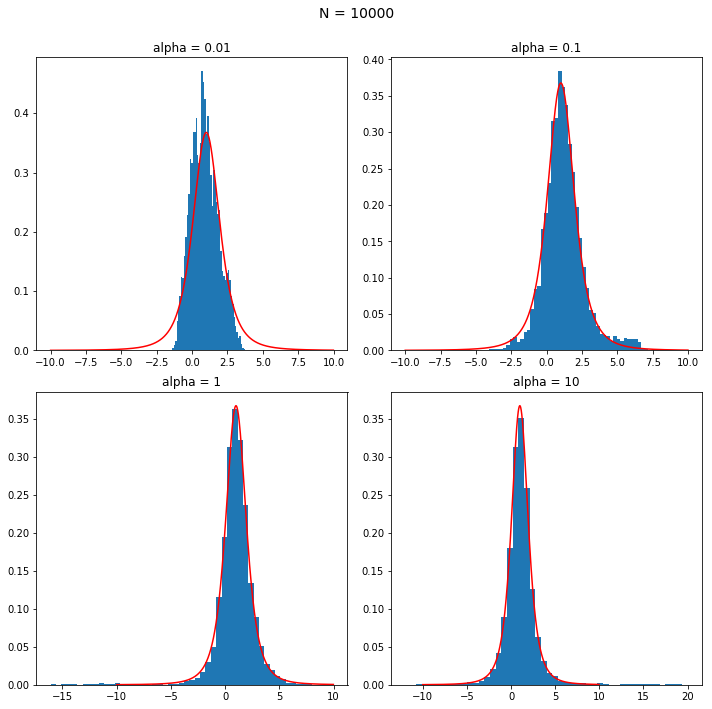

In [133]:
MCMC_T(10000,3,1,1)

Percentage of jumps acepted 97.3 for 0.01
Auto-Correlation length for alpha = 0.01 is h = 136
Percentage of jumps acepted 90.5 for 0.1
Auto-Correlation length for alpha = 0.1 is h = 109
Percentage of jumps acepted 73.9 for 1
Auto-Correlation length for alpha = 1 is h = 38
Percentage of jumps acepted 40.699999999999996 for 10
Auto-Correlation length for alpha = 10 is h = 17


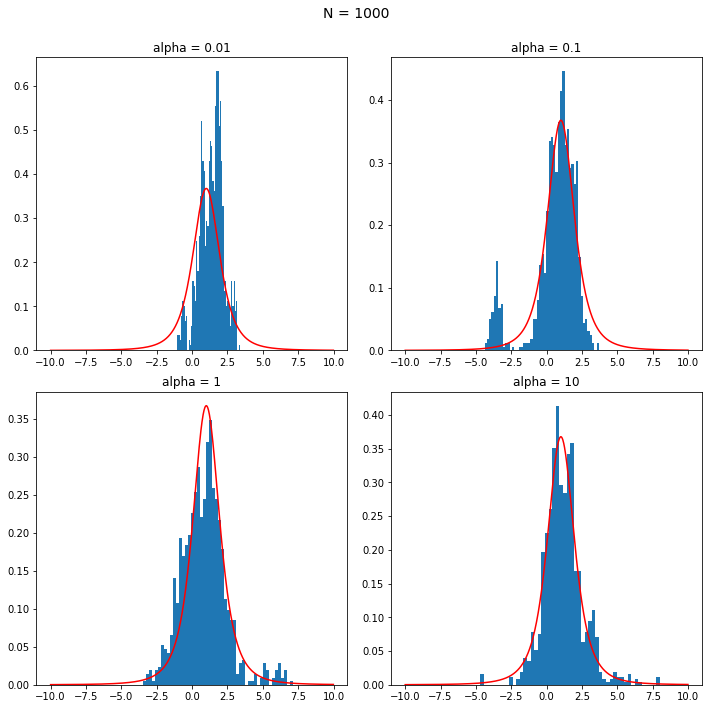

In [135]:
MCMC_T(1000,3,1,1)

range(-2, 2)

In [14]:
x = range(4)

In [16]:
for j in range(3):
    print(j)

0
1
2


In [111]:
x = np.random.uniform(0,1,(10,10))

In [116]:
np.mean(x[0,:])


0.5433928610029111